[2018-02-02 11:10:36,078] Making new env: FrozenLake-v0


For Generation 1 maximum : 0.11
For Generation 2 maximum : 0.27
For Generation 3 maximum : 0.34
For Generation 4 maximum : 0.64
For Generation 5 maximum : 0.71
For Generation 6 maximum : 0.71
For Generation 7 maximum : 0.73
For Generation 8 maximum : 0.75
For Generation 9 maximum : 0.72
For Generation 10 maximum : 0.78
For Generation 11 maximum : 0.86
For Generation 12 maximum : 0.85
For Generation 13 maximum : 0.82
For Generation 14 maximum : 0.85
For Generation 15 maximum : 0.82
For Generation 16 maximum : 0.82
For Generation 17 maximum : 0.86
For Generation 18 maximum : 0.84
For Generation 19 maximum : 0.84
For Generation 20 maximum : 0.83
For Generation 21 maximum : 0.81
For Generation 22 maximum : 0.8
For Generation 23 maximum : 0.82
For Generation 24 maximum : 0.82
For Generation 25 maximum : 0.83
Running time :  97.61056733131409


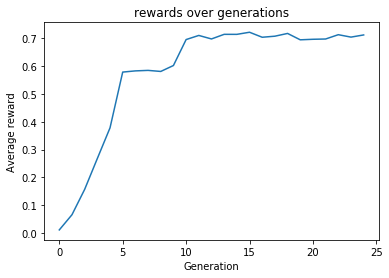

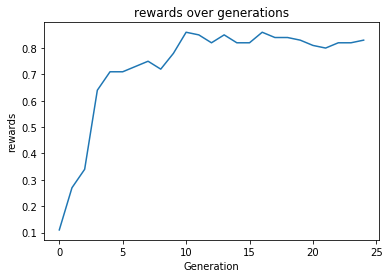

In [6]:
import numpy as np
import gym
import time
import matplotlib.pyplot as plt

N_GENERATION = 25
N_POPS = 100
selection=10
mutation_rate=0.2
env = gym.make('FrozenLake-v0')

#evaluate one pop over n_episodes
def run(env, policy, episode_len=100):
    total_reward = 0
    obs = env.reset()
    for t in range(episode_len):
        #env.render()
        action = policy[obs]
        obs, reward, done, _ = env.step(action)
        total_reward += reward
        if done:
            break
    return total_reward

#FITNESS FUNCTION EVALUATE GIVEN POP THROUGH n-episodes according to the rewards
def fitness(env,policy,n_episodes=100) :
    total_rewards = 0.0
    for _ in range(n_episodes):
        total_rewards += run(env, policy)
    return total_rewards / n_episodes

#Randomly mutate a given pop and change some of it's values 
def mutation(env,policy,rate=0.01):
    prob=np.random.random_sample((16))
    for i in range(len(policy)):
        if prob[i]<rate:
            policy[i]=np.random.choice(4)
    return policy

#Given two parents pop1 and pop2 crossover return one pop(Child) where 
#its params are a random mix between the values of pop1 and pop2
def crossover(policy1,policy2):
    new=policy1.copy()
    prob=np.random.random_sample(16)
    for i in range(16):
        if prob[i]>0.5:
            new[i]=policy2[i]
        else: new[i]=policy1[i]
    return new



if __name__ == '__main__':
  
    start=time.time()
    #Generation of N_POPS random population with the size of 16 and values between 1 and 4 
    all_pop=np.random.randint(env.action_space.n, size=[N_POPS, env.observation_space.n])
    avg=np.zeros(N_GENERATION)
    best = np.zeros(N_GENERATION)
    #loop over generations , it could also be a while loop until we obtain for example a score of 0.9
    for i in range(N_GENERATION):
        #vector as the size of N_POPS contains the score of each pop
        rewards=np.zeros(N_POPS)
        #calculate the score of each pop
        for j in range(N_POPS):
            rewards[j]=fitness(env,all_pop[j])
        print('For Generation',i+1,'maximum :',max(rewards)) 
        #sort of the rewards in order to select the best pops
        avg[i]=np.mean(rewards)
        best[i] = max(rewards)
        best_scores=np.argsort(rewards)        
        #selection of best pops        
        best_scores=best_scores[-selection:]
        best_pops=[all_pop[best_scores[c]] for c in range (len(best_scores))]
        #crossover the best ones randomly and ensure the same size of the pop
        new_pops=[crossover(best_pops[np.random.choice(len(best_scores))],
                            best_pops[np.random.choice(len(best_scores))]) for _ in range(N_POPS)]
        #Mutation over the newmly born pops
        all_pop=[mutation(env,pop) for pop in new_pops]
    end=time.time()
    print('Running time : ',(end-start))

    plt.plot(avg)
    plt.xlabel('Generation')
    plt.ylabel('Average reward')
    plt.title('rewards over generations')
    plt.show()
    plt.plot(best)
    plt.xlabel('Generation')
    plt.ylabel('rewards')
    plt.title('rewards over generations')
    plt.show()

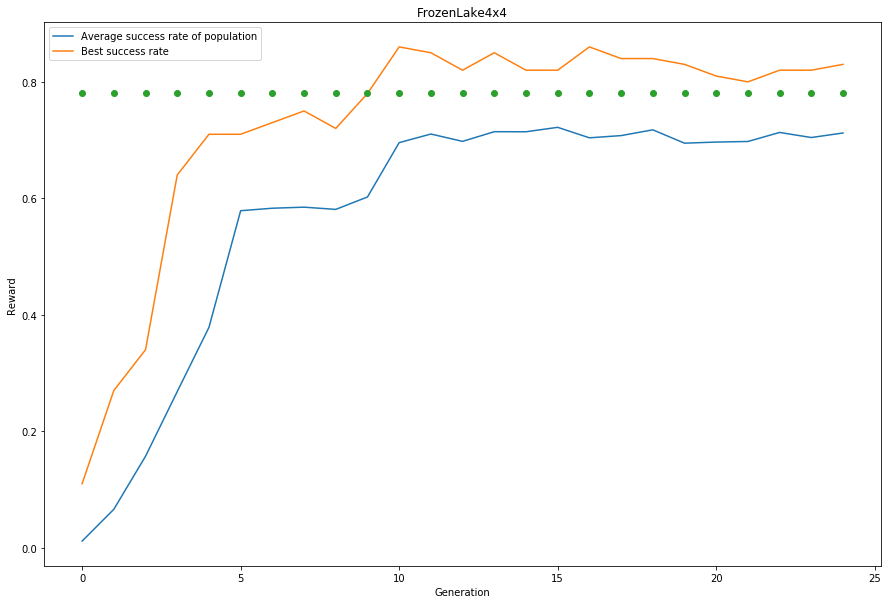

In [15]:
lim=np.zeros(25)+0.78
fig, ax = plt.subplots()

l1, = ax.plot(avg)
l2, = ax.plot(best,)
l3=ax.plot(lim,'o')

ax.legend((l1, l2), ('Average success rate of population', 'Best success rate'), loc='upper left', shadow=False)
ax.set_xlabel('Generation')
ax.set_ylabel('Reward')
ax.set_title('FrozenLake4x4')
plt.gcf().set_size_inches(15, 10)
plt.savefig('FrozenLake4x4_25gen_genomerepres.png')
plt.show()